<a href="https://colab.research.google.com/github/MKrezheska/NLP_Project-Style_Change_Detection/blob/main/Models_RoBERTa_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
import json
import numpy as np 
import time
import joblib

In [4]:
df_1 = pd.read_csv('drive/MyDrive/pan-2021/train-690-roberta-768-long-vectors.csv')
df_2 = pd.read_csv('drive/MyDrive/pan-2021/train-2000-roberta-768-long-vectors.csv')
df_3 = pd.read_csv('drive/MyDrive/pan-2021/train-4000-roberta-768-long-vectors.csv')
df_4 = pd.read_csv('drive/MyDrive/pan-2021/train-7000-roberta-768-long-vectors.csv')
df_5 = pd.read_csv('drive/MyDrive/pan-2021/train-end-roberta-768-long-vectors.csv')


df = pd.concat([df_1, df_2, df_3, df_4, df_5])

In [5]:
df

,Unnamed: 0,file_name,emb,changes,label,authors,paragraph_authors
0,0,problem-10702,"[-0.06933309137821198, 0.08886080235242844, -0...","[1, 1, 1, 0, 1]",1,2,"[1, 2, 1, 2, 2, 1]"
1,1,problem-10706,"[-0.059775013476610184, 0.08716754615306854, -...","[0, 1, 1, 1, 1, 1]",1,4,"[1, 1, 2, 3, 4, 3, 2]"
2,2,problem-10710,"[-0.05192521959543228, 0.0976557806134224, -0....","[1, 1, 0, 1, 0, 1]",1,4,"[1, 2, 3, 3, 4, 4, 3]"
3,3,problem-10712,"[-0.058702100068330765, 0.08107157796621323, -...","[0, 0, 0, 0, 1, 1]",1,2,"[1, 1, 1, 1, 1, 2, 1]"
4,4,problem-10708,"[-0.06454212963581085, 0.08104275166988373, -0...","[1, 0, 0, 0, 1]",1,3,"[1, 2, 2, 2, 2, 3]"
...,...,...,...,...,...,...,...
4195,4195,problem-207,"[-0.041760582476854324, 0.0787864625453949, -0...","[1, 0, 0]",1,2,"[1, 2, 2, 2]"
4196,4196,problem-211,"[-0.05708981305360794, 0.08273273706436157, -0...","[0, 0, 1, 0, 1, 0, 0]",1,3,"[1, 1, 1, 2, 2, 3, 3, 3]"
4197,4197,problem-208,"[-0.05604788288474083, 0.101335808634758, -0.0...","[1, 1, 0, 0, 1]",1,2,"[1, 2, 1, 1, 1, 2]"
4198,4198,problem-217,"[-0.06293439120054245, 0.0814419537782669, -0....","[1, 1, 1]",1,3,"[1, 2, 3, 2]"


In [6]:
df = df.drop(["Unnamed: 0","file_name", "changes", "authors", "paragraph_authors"], axis="columns")

In [7]:
df_valid = pd.read_csv('drive/MyDrive/pan-2021/validation-roberta-768-long-vectors.csv')
df_valid.head()

,Unnamed: 0,file_name,emb,changes,label,authors,paragraph_authors
0,0,problem-1899,"[-0.06812208890914917, 0.08334814757108688, -0...","[0, 1, 1, 1, 1, 1, 0, 1]",1,4,"[1, 1, 2, 3, 1, 4, 3, 3, 1]"
1,1,problem-1906,"[-0.07429127395153046, 0.07846497744321823, -0...","[1, 0, 1]",1,3,"[1, 2, 2, 3]"
2,2,problem-1903,"[-0.06153155490756035, 0.07799900323152542, -0...","[1, 1, 1, 1, 0, 0]",1,3,"[1, 2, 3, 1, 3, 3, 3]"
3,3,problem-1900,"[-0.059520427137613297, 0.08365883678197861, -...","[1, 1, 1, 1, 1]",1,4,"[1, 2, 1, 3, 4, 2]"
4,4,problem-1904,"[-0.05482497438788414, 0.09679285436868668, -0...","[0, 1, 1, 0, 1, 1, 1, 1]",1,4,"[1, 1, 2, 3, 3, 1, 2, 4, 1]"


In [8]:
df_valid = df_valid.drop(["Unnamed: 0","file_name", "changes", "authors", "paragraph_authors"], axis="columns")

In [9]:
df_train = df.iloc[:, : ]
df_test = df_valid.iloc[:, : ]
print(len(df_train))
print(len(df_test))

11197
2400


In [10]:
y_train = df_train['label']
df_train.drop(['label'], axis=1, inplace= True)
df_train.head(20)

,emb
0,"[-0.06933309137821198, 0.08886080235242844, -0..."
1,"[-0.059775013476610184, 0.08716754615306854, -..."
2,"[-0.05192521959543228, 0.0976557806134224, -0...."
3,"[-0.058702100068330765, 0.08107157796621323, -..."
4,"[-0.06454212963581085, 0.08104275166988373, -0..."
5,"[-0.07626723498106003, 0.07279245555400848, -0..."
6,"[-0.04915666580200195, 0.07974720746278763, -0..."
7,"[-0.04666608199477196, 0.08518311381340027, -0..."
8,"[-0.05412495136260986, 0.07708549499511719, -0..."
9,"[-0.06253185123205185, 0.08380239456892014, -0..."


In [11]:
y_test = df_test['label']
df_test.drop(['label'], axis=1, inplace= True)
df_test.head(20)

,emb
0,"[-0.06812208890914917, 0.08334814757108688, -0..."
1,"[-0.07429127395153046, 0.07846497744321823, -0..."
2,"[-0.06153155490756035, 0.07799900323152542, -0..."
3,"[-0.059520427137613297, 0.08365883678197861, -..."
4,"[-0.05482497438788414, 0.09679285436868668, -0..."
5,"[-0.04895215108990669, 0.09911777079105377, -0..."
6,"[-0.06733780354261398, 0.09219272434711456, -0..."
7,"[-0.06058989837765694, 0.08327583968639374, -0..."
8,"[-0.06618160009384155, 0.09293551743030548, -0..."
9,"[-0.05665931850671768, 0.08093248307704926, -0..."


In [12]:
xtrain = df_train.values.tolist()
X_test = df_test.values.tolist()

In [13]:
xtrain = [eval(xtrain[i][0]) for i in range(0, len(xtrain))]
X_test = [eval(X_test[i][0]) for i in range(0, len(X_test))]

In [14]:
xtrain = np.asarray(xtrain)

In [15]:
X_test = np.asarray(X_test)

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [17]:
def print_confusion_matrix(preds, labels, names):
  print(classification_report(labels, preds))

  # Mатрица на конфузија 
  names = names
  confusion = confusion_matrix(labels, preds)
  confusion = 100 * confusion.astype('float') / confusion.sum(axis=-1)[:, np.newaxis]
  df_1 = pd.DataFrame(data=confusion, columns=names, index=names)
  image = sns.heatmap(df_1, annot=True, fmt=".1f", vmin=0, vmax=100,cmap='Greens')
  image.set_title('Confusion matrix')
  image.set_ylabel('True label')
  image.set_xlabel('Predicted label')
  image.plot()

In [18]:
ytrain = y_train

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier()
nbc = GaussianNB()
rfc = RandomForestClassifier()

dtc.fit(xtrain, ytrain)
nbc.fit(xtrain, ytrain)
rfc.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
test_tree_predict = dtc.predict(X_test)
test_naive_predict = nbc.predict(X_test)
test_random_forest_predict = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.41      0.39      0.40       600
           1       0.80      0.81      0.81      1800

    accuracy                           0.71      2400
   macro avg       0.60      0.60      0.60      2400
weighted avg       0.70      0.71      0.70      2400



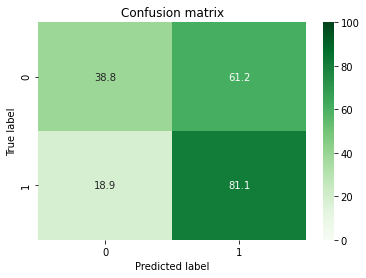

In [ ]:
print_confusion_matrix(test_tree_predict,y_test, ["0", "1"])

              precision    recall  f1-score   support

           0       0.42      0.52      0.46       600
           1       0.83      0.76      0.79      1800

    accuracy                           0.70      2400
   macro avg       0.62      0.64      0.63      2400
weighted avg       0.72      0.70      0.71      2400



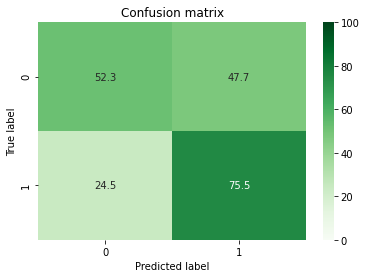

In [ ]:
print_confusion_matrix(test_naive_predict, y_test, ["0", "1"])

              precision    recall  f1-score   support

           0       0.65      0.21      0.32       600
           1       0.79      0.96      0.86      1800

    accuracy                           0.77      2400
   macro avg       0.72      0.59      0.59      2400
weighted avg       0.75      0.77      0.73      2400



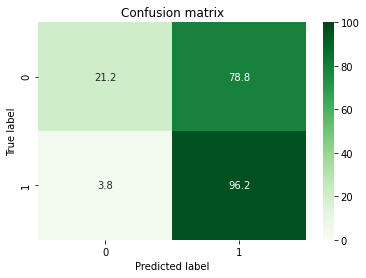

In [ ]:
print_confusion_matrix(test_random_forest_predict,y_test, ["0", "1"])

In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score


parameters_rf = {
          "criterion":['gini','entropy'],
          "max_depth": [3,5,None],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 5],
          "min_samples_split": [2, 5],
          'bootstrap': [False, True],
          'max_samples': [0.5, 1],
          'n_estimators': [2, 5, 100],
          "oob_score":[False, True],
           "random_state":[None,2]
         }


gs_rf = RandomizedSearchCV(rfc, parameters_rf, scoring='accuracy', n_jobs=3)
gs_rf.fit(xtrain, ytrain)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

Best score: 0.766
Best parameters set:
	 bootstrap: True
	 criterion: 'entropy'
	 max_depth: None
	 max_features: 'auto'
	 max_samples: 0.5
	 min_samples_leaf: 1
	 min_samples_split: 5
	 n_estimators: 100
	 oob_score: True
	 random_state: 2
accuracy:  0.7691666666666667
              precision    recall  f1-score   support

           0       0.72      0.13      0.22       600
           1       0.77      0.98      0.86      1800

    accuracy                           0.77      2400
   macro avg       0.74      0.55      0.54      2400
weighted avg       0.76      0.77      0.70      2400



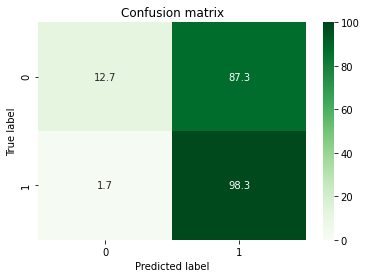

In [ ]:
print("Best score: %0.3f" % gs_rf.best_score_) 
print("Best parameters set:" )
best_parameters_rf = gs_rf.best_estimator_.get_params()
for param_name_rf in sorted (parameters_rf . keys()): 
                    print("\t %s: %r" % (param_name_rf, best_parameters_rf[param_name_rf]))
        
y_pred = gs_rf.predict(X_test)

# print(classification_report(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
print_confusion_matrix( y_pred,y_test, ["0", "1"])

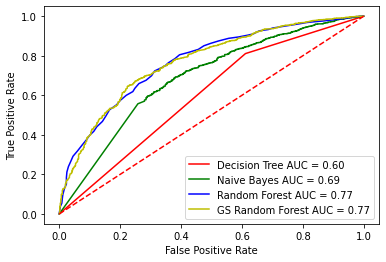

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = y_test
decision_tree_prob = [p[1] for p in dtc.predict_proba(X_test)]
naive_bayes_prob = [p[1] for p in nbc.predict_proba(X_test)]
random_forest_prob = [p[1] for p in rfc.predict_proba(X_test)]
random_forest_prob_1 = [p[1] for p in gs_rf.predict_proba(X_test)]


dt_false_pos, dt_true_pos, _ = roc_curve(actual, decision_tree_prob)
dt_auc = auc(dt_false_pos, dt_true_pos)

nb_false_pos, nb_true_pos, _ = roc_curve(actual, naive_bayes_prob)
nb_auc = auc(nb_false_pos, nb_true_pos)

rf_false_pos, rf_true_pos, _ = roc_curve(actual, random_forest_prob)
rf_auc = auc(rf_false_pos, rf_true_pos)

gs_rf_false_pos, gs_rf_true_pos, _ = roc_curve(actual, random_forest_prob_1)
gs_rf_auc = auc(gs_rf_false_pos, gs_rf_true_pos)

# plot
plt.plot(dt_false_pos, dt_true_pos, 'r', label='Decision Tree AUC = %0.2f'% dt_auc)
plt.plot(nb_false_pos, nb_true_pos, 'g', label='Naive Bayes AUC = %0.2f'% nb_auc)
plt.plot(rf_false_pos, rf_true_pos, 'b', label='Random Forest AUC = %0.2f'% rf_auc)
plt.plot(gs_rf_false_pos, gs_rf_true_pos, 'y', label='GS Random Forest AUC = %0.2f'% gs_rf_auc)


plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
X_train_norm = xtrain
X_test_norm = X_test

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 28 kB/s 


In [ ]:
from catboost import Pool, cv, CatBoostClassifier, CatBoostRegressor

In [ ]:
train_pool = Pool(data=xtrain,label = ytrain)

In [33]:
import sklearn.metrics as metrics

In [ ]:
model_basic = CatBoostClassifier()
model_basic.fit(train_pool, plot=True,silent=True)
print(model_basic.get_best_score())

predicted_values = model_basic.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'Logloss': 0.2147108048164885}}


              precision    recall  f1-score   support

           0       0.68      0.33      0.44       600
           1       0.81      0.95      0.87      1800

    accuracy                           0.79      2400
   macro avg       0.74      0.64      0.66      2400
weighted avg       0.78      0.79      0.77      2400

Accuracy: 0.79375


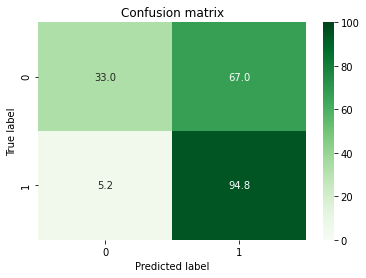

In [ ]:
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

Learning rate:  0.5
              precision    recall  f1-score   support

           0       0.63      0.31      0.41       600
           1       0.80      0.94      0.87      1800

    accuracy                           0.78      2400
   macro avg       0.71      0.62      0.64      2400
weighted avg       0.76      0.78      0.75      2400



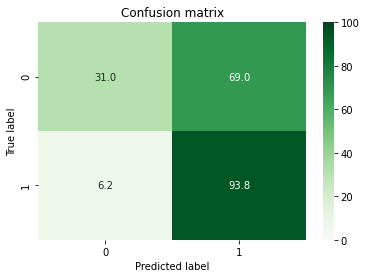

Learning rate:  0.75
              precision    recall  f1-score   support

           0       0.54      0.31      0.39       600
           1       0.80      0.91      0.85      1800

    accuracy                           0.76      2400
   macro avg       0.67      0.61      0.62      2400
weighted avg       0.73      0.76      0.74      2400



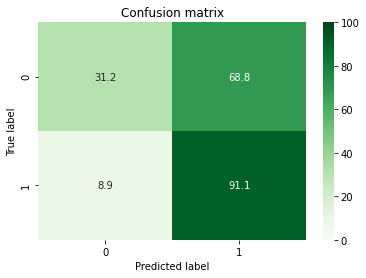

Learning rate:  1
              precision    recall  f1-score   support

           0       0.49      0.34      0.40       600
           1       0.80      0.88      0.84      1800

    accuracy                           0.74      2400
   macro avg       0.64      0.61      0.62      2400
weighted avg       0.72      0.74      0.73      2400



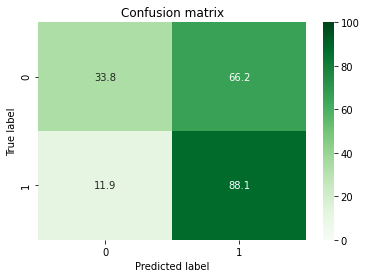

Learning rate:  1.1
              precision    recall  f1-score   support

           0       0.53      0.34      0.41       600
           1       0.80      0.90      0.85      1800

    accuracy                           0.76      2400
   macro avg       0.67      0.62      0.63      2400
weighted avg       0.74      0.76      0.74      2400



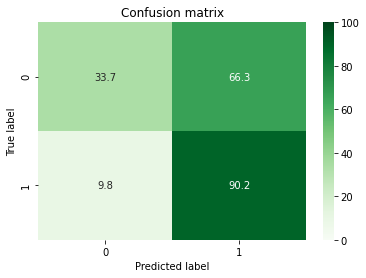

Learning rate:  1.2
              precision    recall  f1-score   support

           0       0.50      0.37      0.43       600
           1       0.81      0.88      0.84      1800

    accuracy                           0.75      2400
   macro avg       0.66      0.62      0.63      2400
weighted avg       0.73      0.75      0.74      2400



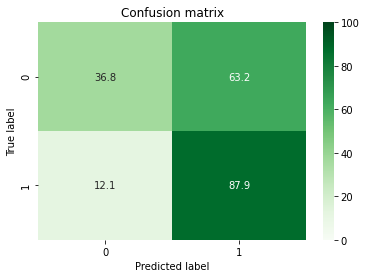

Learning rate:  1.3
              precision    recall  f1-score   support

           0       0.46      0.33      0.39       600
           1       0.80      0.87      0.83      1800

    accuracy                           0.74      2400
   macro avg       0.63      0.60      0.61      2400
weighted avg       0.71      0.74      0.72      2400



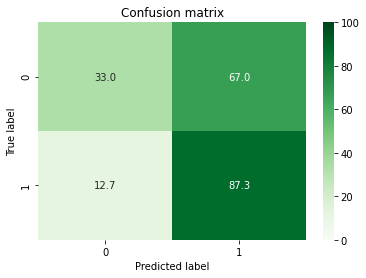

Learning rate:  1.4
              precision    recall  f1-score   support

           0       0.49      0.37      0.42       600
           1       0.81      0.87      0.84      1800

    accuracy                           0.75      2400
   macro avg       0.65      0.62      0.63      2400
weighted avg       0.73      0.75      0.73      2400



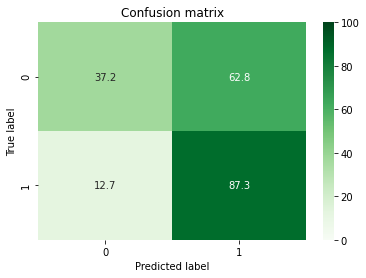

Learning rate:  1.5
              precision    recall  f1-score   support

           0       0.48      0.36      0.41       600
           1       0.80      0.87      0.84      1800

    accuracy                           0.74      2400
   macro avg       0.64      0.62      0.62      2400
weighted avg       0.72      0.74      0.73      2400



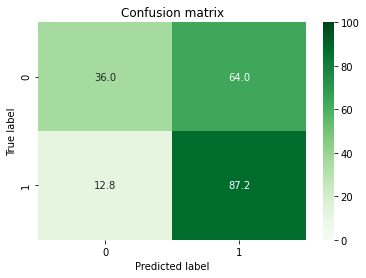

Learning rate:  2
              precision    recall  f1-score   support

           0       0.39      0.40      0.39       600
           1       0.80      0.79      0.79      1800

    accuracy                           0.69      2400
   macro avg       0.59      0.59      0.59      2400
weighted avg       0.70      0.69      0.69      2400



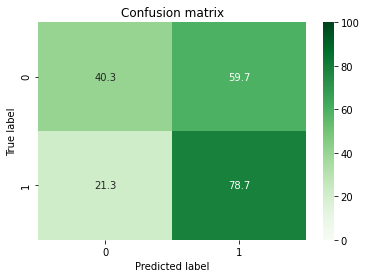

Learning rate:  3
              precision    recall  f1-score   support

           0       0.28      0.35      0.31       600
           1       0.76      0.71      0.73      1800

    accuracy                           0.62      2400
   macro avg       0.52      0.53      0.52      2400
weighted avg       0.64      0.62      0.63      2400



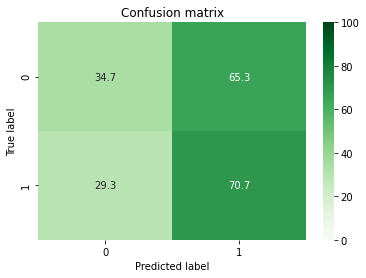

Learning rate:  4
              precision    recall  f1-score   support

           0       0.27      0.31      0.29       600
           1       0.76      0.72      0.74      1800

    accuracy                           0.62      2400
   macro avg       0.51      0.51      0.51      2400
weighted avg       0.63      0.62      0.62      2400



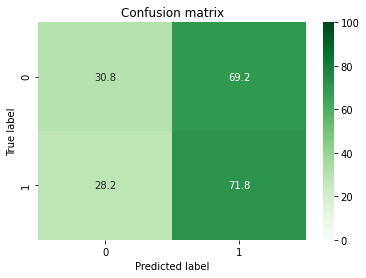

Learning rate:  5
              precision    recall  f1-score   support

           0       0.28      0.38      0.32       600
           1       0.76      0.67      0.72      1800

    accuracy                           0.60      2400
   macro avg       0.52      0.53      0.52      2400
weighted avg       0.64      0.60      0.62      2400



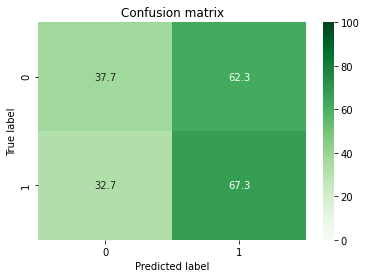

Learning rate:  6.3
              precision    recall  f1-score   support

           0       0.25      0.50      0.34       600
           1       0.75      0.51      0.61      1800

    accuracy                           0.51      2400
   macro avg       0.50      0.50      0.47      2400
weighted avg       0.63      0.51      0.54      2400



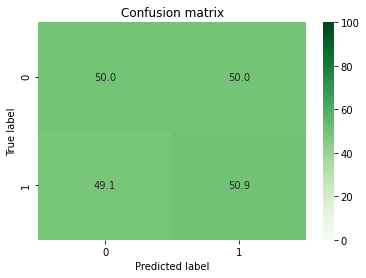

Learning rate:  7.7
              precision    recall  f1-score   support

           0       0.22      0.46      0.30       600
           1       0.71      0.44      0.54      1800

    accuracy                           0.45      2400
   macro avg       0.46      0.45      0.42      2400
weighted avg       0.59      0.45      0.48      2400



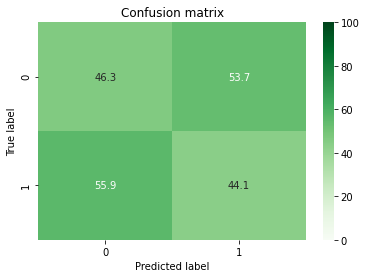

Learning rate:  10
              precision    recall  f1-score   support

           0       0.24      0.64      0.34       600
           1       0.72      0.31      0.43      1800

    accuracy                           0.39      2400
   macro avg       0.48      0.47      0.39      2400
weighted avg       0.60      0.39      0.41      2400



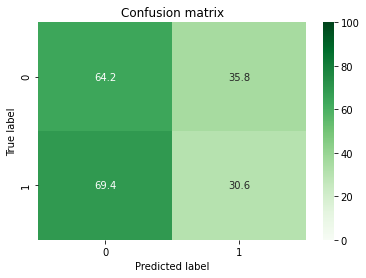

Learning rate:  20
              precision    recall  f1-score   support

           0       0.33      0.26      0.29       600
           1       0.77      0.82      0.79      1800

    accuracy                           0.68      2400
   macro avg       0.55      0.54      0.54      2400
weighted avg       0.66      0.68      0.67      2400



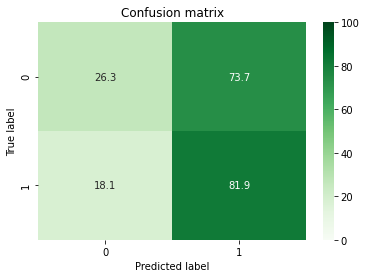

Learning rate:  30
              precision    recall  f1-score   support

           0       0.34      0.27      0.30       600
           1       0.77      0.83      0.80      1800

    accuracy                           0.69      2400
   macro avg       0.56      0.55      0.55      2400
weighted avg       0.66      0.69      0.67      2400



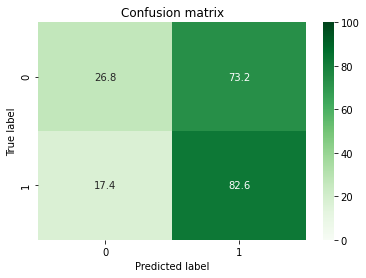

Learning rate:  45
              precision    recall  f1-score   support

           0       0.24      0.56      0.34       600
           1       0.74      0.41      0.53      1800

    accuracy                           0.45      2400
   macro avg       0.49      0.48      0.43      2400
weighted avg       0.61      0.45      0.48      2400



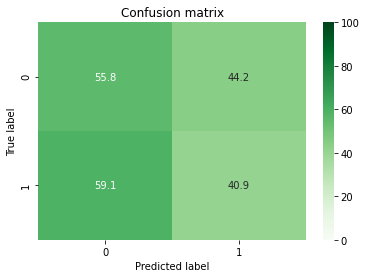

Learning rate:  55
              precision    recall  f1-score   support

           0       0.27      0.45      0.34       600
           1       0.76      0.59      0.67      1800

    accuracy                           0.56      2400
   macro avg       0.52      0.52      0.50      2400
weighted avg       0.64      0.56      0.59      2400



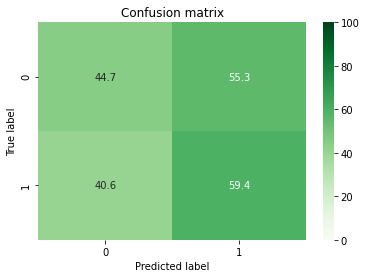

Learning rate:  62
              precision    recall  f1-score   support

           0       0.23      0.49      0.31       600
           1       0.73      0.45      0.56      1800

    accuracy                           0.46      2400
   macro avg       0.48      0.47      0.43      2400
weighted avg       0.60      0.46      0.49      2400



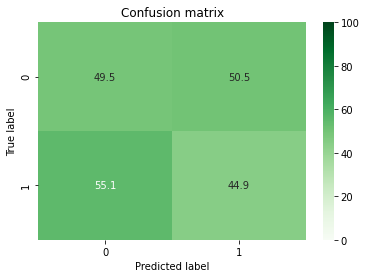

Learning rate:  77
              precision    recall  f1-score   support

           0       0.27      0.47      0.35       600
           1       0.77      0.58      0.66      1800

    accuracy                           0.55      2400
   macro avg       0.52      0.53      0.50      2400
weighted avg       0.64      0.55      0.58      2400



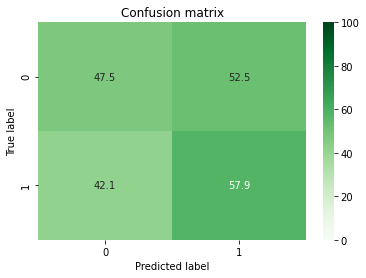

Learning rate:  84
              precision    recall  f1-score   support

           0       0.26      0.49      0.34       600
           1       0.75      0.53      0.62      1800

    accuracy                           0.52      2400
   macro avg       0.51      0.51      0.48      2400
weighted avg       0.63      0.52      0.55      2400



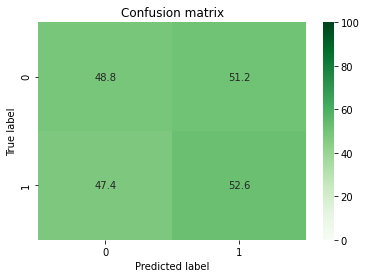

Learning rate:  90
              precision    recall  f1-score   support

           0       0.28      0.34      0.30       600
           1       0.76      0.70      0.73      1800

    accuracy                           0.61      2400
   macro avg       0.52      0.52      0.52      2400
weighted avg       0.64      0.61      0.62      2400



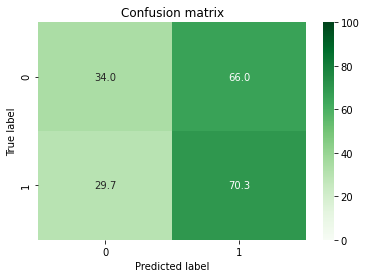

In [ ]:
lr_list = [ 0.5, 0.75, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4, 5, 6.3, 7.7, 10, 20, 30, 45, 55, 62, 77, 84, 90]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=10, max_depth=10, random_state=0)
    gb_clf.fit(xtrain, ytrain)
    predicted_values = gb_clf.predict(X_test)

    print("Learning rate: ", learning_rate)
    print_confusion_matrix(predicted_values, y_test, ["0", "1"])
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import scipy.stats as st

In [ ]:
X_val, X_test_1, y_val, y_test_1 = train_test_split(X_test, y_test, test_size=0.7, random_state=42)

In [ ]:
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support, roc_auc_score)

gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=xtrain, y=ytrain)
fit_params_of_xgb = {
    "early_stopping_rounds":100, 
    "eval_metric" : 'auc', 
    "eval_set" : [(X_val,y_val)],
    'verbose': 500,
}
params = {
    'booster': ["gbtree"],
    'learning_rate': [0.01],
    'n_estimators': [3000],
    'min_child_weight': [1],#1
    'gamma': [0],
    'subsample': [0.4],
    'colsample_bytree': [0.8],
    'max_depth': [4],
    "scale_pos_weight": [1],
    "reg_alpha":[1],#0.08
}
xgb_estimator = XGBClassifier(
    objective='binary:logistic',
    silent=True,
)

gsearch = GridSearchCV(
    estimator=xgb_estimator,
    param_grid=params,
    scoring='roc_auc',
    n_jobs=-1,
    cv=gkf, verbose=3
)
xgb_model = gsearch.fit(X=xtrain, y=ytrain, **fit_params_of_xgb)
gsearch.best_params_, gsearch.best_score_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 20.3min finished


[0]	validation_0-auc:0.639006
Will train until validation_0-auc hasn't improved in 100 rounds.
[500]	validation_0-auc:0.779994
[1000]	validation_0-auc:0.799076
[1500]	validation_0-auc:0.809241
[2000]	validation_0-auc:0.812852
Stopping. Best iteration:
[1925]	validation_0-auc:0.813684



({'booster': 'gbtree',
  'colsample_bytree': 0.8,
  'gamma': 0,
  'learning_rate': 0.01,
  'max_depth': 4,
  'min_child_weight': 1,
  'n_estimators': 3000,
  'reg_alpha': 1,
  'scale_pos_weight': 1,
  'subsample': 0.4},
 0.8141911471279871)

In [ ]:
predicted_values = xgb_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       600
           1       0.81      0.95      0.88      1800

    accuracy                           0.80      2400
   macro avg       0.75      0.65      0.67      2400
weighted avg       0.78      0.80      0.77      2400

Accuracy: 0.7979166666666667


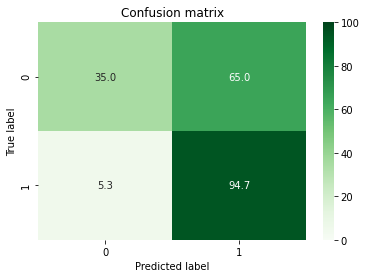

In [ ]:
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

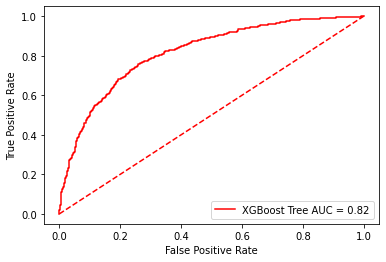

In [ ]:
actual = y_test
xg_tree_prob = [p[1] for p in xgb_model.predict_proba(X_test)]


dt_false_pos, dt_true_pos, _ = roc_curve(actual, xg_tree_prob)
dt_auc = auc(dt_false_pos, dt_true_pos)

# plot
plt.plot(dt_false_pos, dt_true_pos, 'r', label='XGBoost Tree AUC = %0.2f'% dt_auc)


plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier((20, ), max_iter=100000).fit(xtrain, ytrain)

In [ ]:
predicted_values = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.61      0.45      0.52       600
           1       0.83      0.91      0.87      1800

    accuracy                           0.79      2400
   macro avg       0.72      0.68      0.69      2400
weighted avg       0.78      0.79      0.78      2400

Accuracy: 0.7908333333333334


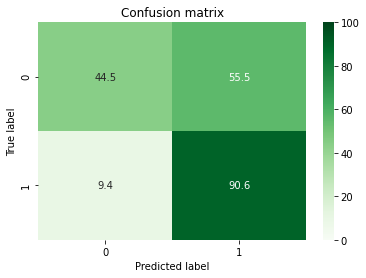

In [ ]:
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.59      0.49      0.54       600
           1       0.84      0.89      0.86      1800

    accuracy                           0.79      2400
   macro avg       0.71      0.69      0.70      2400
weighted avg       0.78      0.79      0.78      2400

Accuracy: 0.7875


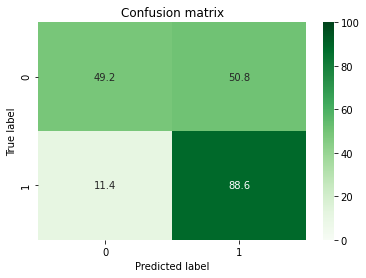

In [ ]:
clf = MLPClassifier((20, 20, ), max_iter=100000).fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


              precision    recall  f1-score   support

           0       0.70      0.41      0.52       600
           1       0.83      0.94      0.88      1800

    accuracy                           0.81      2400
   macro avg       0.77      0.68      0.70      2400
weighted avg       0.80      0.81      0.79      2400

Accuracy: 0.8095833333333333


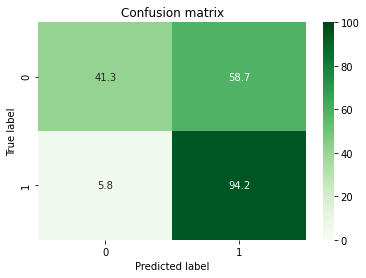

In [ ]:
clf = MLPClassifier((1000, ), max_iter=100000).fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.68      0.48      0.56       600
           1       0.84      0.93      0.88      1800

    accuracy                           0.81      2400
   macro avg       0.76      0.70      0.72      2400
weighted avg       0.80      0.81      0.80      2400

Accuracy: 0.8141666666666667


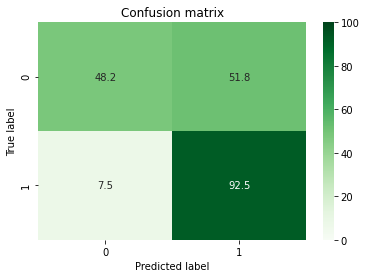

In [ ]:
clf = MLPClassifier((256, 64, 128, ), max_iter=100000, learning_rate="invscaling").fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

Undersampling со RandomUndersampler

In [25]:
from collections import Counter
# from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle

undersample = RandomUnderSampler(sampling_strategy=0.75)
X_train = xtrain
X_over, y_over = undersample.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_over))

Resampled dataset shape Counter({1: 3732, 0: 2799})


In [26]:
final, targets = shuffle(X_over,y_over,random_state=0)
X_train_u  = final
y_train_u  = targets
X_test = df_test.values.tolist()
print('Training set class distribution %s' % Counter(y_train_u))
print('Testing set class distribution %s' % Counter(y_test))

Training set class distribution Counter({1: 3732, 0: 2799})
Testing set class distribution Counter({1: 1800, 0: 600})


([<matplotlib.patches.Wedge at 0x7f938556c6d0>,
 [Text(-0.24477311341532162, 1.0724206837565984, '1.0'),
  Text(0.24477321382259096, -1.072420660839281, '0.0')],
 [Text(-0.13351260731744813, 0.5849567365945082, '57%'),
  Text(0.13351266208504958, -0.5849567240941532, '43%')])

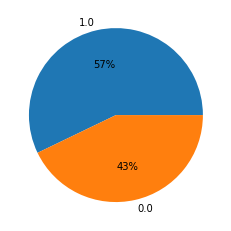

In [27]:
import matplotlib.pyplot as pyplot
pyplot.pie([float(v) for v in Counter(y_train_u).values()], labels=[float(k) for k in Counter(y_train_u).keys()],
           autopct='%1.0f%%')

Oversampling со SMOTE

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
from numpy import where
# X = df_train.values.tolist()
counter = Counter(ytrain)
print('Original dataset shape %s' % Counter(ytrain))
oversample = SMOTE(sampling_strategy=0.7)
X_train_o, y_train_o = oversample.fit_resample(xtrain, ytrain)
print('Resampled dataset shape %s' % Counter(y_train_o))

Original dataset shape Counter({1: 8398, 0: 2799})
Resampled dataset shape Counter({1: 8398, 0: 5878})


([<matplotlib.patches.Wedge at 0x7fc5600ae990>,
 [Text(-0.3011113896724269, 1.0579848444139168, '1.0'),
  Text(0.30111129061673503, -1.0579848726059953, '0.0')],
 [Text(-0.1642425761849601, 0.577082642407591, '59%'),
  Text(0.1642425221545827, -0.5770826577850883, '41%')])

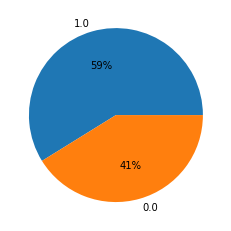

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.pie([float(v) for v in Counter(y_train_o).values()], labels=[float(k) for k in Counter(y_train_o).keys()],
           autopct='%1.0f%%')

Комбинација: Undersampling на majority, Oversampling на minority

In [ ]:
from imblearn.pipeline import Pipeline
print('Original dataset shape %s' % Counter(ytrain))
over = SMOTE(sampling_strategy=0.7)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('u', under),('o', over)]
pipeline = Pipeline(steps=steps)
X_train_ou, y_train_ou = pipeline.fit_resample(xtrain, ytrain)
counter = Counter(y_train_ou)
print('Resampled dataset shape %s' % Counter(counter))

Original dataset shape Counter({1: 8398, 0: 2799})
Resampled dataset shape Counter({1: 5598, 0: 3918})


([<matplotlib.patches.Wedge at 0x7fc55fc93f10>,
 [Text(0.30115259661106936, 1.0579731157049364, '0.0'),
  Text(-0.30115259661106925, -1.0579731157049364, '1.0')],
 [Text(0.16426505269694688, 0.5770762449299652, '41%'),
  Text(-0.16426505269694683, -0.5770762449299652, '59%')])

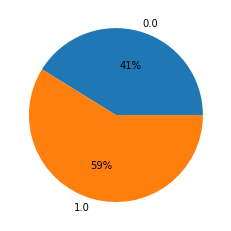

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.pie([float(v) for v in Counter(y_train_ou).values()], labels=[float(k) for k in Counter(y_train_ou).keys()],
           autopct='%1.0f%%')

In [31]:
X_test = [eval(X_test[i][0]) for i in range(0, len(X_test))]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier()
nbc = GaussianNB()
rfc = RandomForestClassifier()

dtc.fit(X_train_u, y_train_u)
nbc.fit(X_train_u, y_train_u)
rfc.fit(X_train_u, y_train_u)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
test_tree_predict = dtc.predict(X_test)
test_naive_predict = nbc.predict(X_test)
test_random_forest_predict = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.35      0.45      0.39       600
           1       0.80      0.72      0.76      1800

    accuracy                           0.65      2400
   macro avg       0.57      0.58      0.57      2400
weighted avg       0.68      0.65      0.66      2400



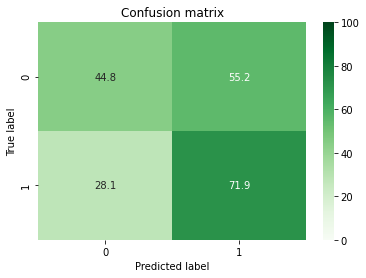

In [ ]:
print_confusion_matrix(test_tree_predict,y_test, ["0", "1"])

              precision    recall  f1-score   support

           0       0.41      0.53      0.46       600
           1       0.83      0.75      0.79      1800

    accuracy                           0.69      2400
   macro avg       0.62      0.64      0.63      2400
weighted avg       0.72      0.69      0.71      2400



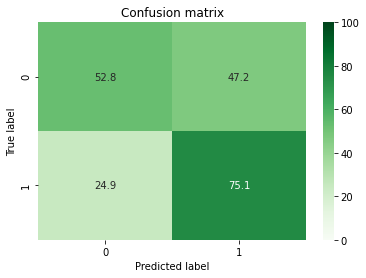

In [ ]:
print_confusion_matrix(test_naive_predict, y_test, ["0", "1"])

              precision    recall  f1-score   support

           0       0.57      0.37      0.45       600
           1       0.81      0.91      0.86      1800

    accuracy                           0.77      2400
   macro avg       0.69      0.64      0.65      2400
weighted avg       0.75      0.77      0.75      2400



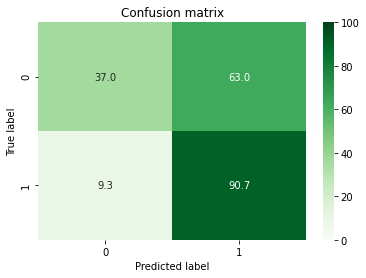

In [ ]:
print_confusion_matrix(test_random_forest_predict,y_test, ["0", "1"])

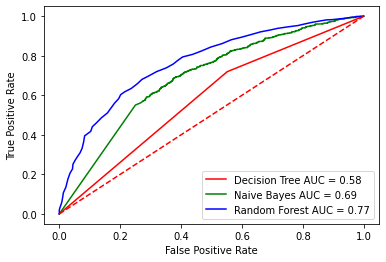

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = y_test
decision_tree_prob = [p[1] for p in dtc.predict_proba(X_test)]
naive_bayes_prob = [p[1] for p in nbc.predict_proba(X_test)]
random_forest_prob = [p[1] for p in rfc.predict_proba(X_test)]


dt_false_pos, dt_true_pos, _ = roc_curve(actual, decision_tree_prob)
dt_auc = auc(dt_false_pos, dt_true_pos)

nb_false_pos, nb_true_pos, _ = roc_curve(actual, naive_bayes_prob)
nb_auc = auc(nb_false_pos, nb_true_pos)

rf_false_pos, rf_true_pos, _ = roc_curve(actual, random_forest_prob)
rf_auc = auc(rf_false_pos, rf_true_pos)


# plot
plt.plot(dt_false_pos, dt_true_pos, 'r', label='Decision Tree AUC = %0.2f'% dt_auc)
plt.plot(nb_false_pos, nb_true_pos, 'g', label='Naive Bayes AUC = %0.2f'% nb_auc)
plt.plot(rf_false_pos, rf_true_pos, 'b', label='Random Forest AUC = %0.2f'% rf_auc)


plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import keras
from keras.models import Sequential 
from keras.layers import Dense   
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_ou, y_train_ou, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.fit_transform(X_val)
X_test_norm = scaler.fit_transform(X_test)

In [ ]:
classifier = Sequential()

classifier.add(Dense(64, activation='relu', input_dim=768))

classifier.add(Dense(256, activation='relu'))

classifier.add(Dense(1, activation='sigmoid'))


classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=30)
history_callback = classifier.fit(X_train_norm, y_train, epochs=500, batch_size=64,validation_data=(X_val_norm,y_val), callbacks=[es])

Epoch 1/500
119/119 [==============================] - 1s 5ms/step - loss: 0.6017 - accuracy: 0.6722 - val_loss: 0.5628 - val_accuracy: 0.7132
Epoch 2/500
119/119 [==============================] - 0s 3ms/step - loss: 0.4881 - accuracy: 0.7656 - val_loss: 0.5244 - val_accuracy: 0.7458
Epoch 3/500
119/119 [==============================] - 0s 3ms/step - loss: 0.4257 - accuracy: 0.7987 - val_loss: 0.5320 - val_accuracy: 0.7442
Epoch 4/500
119/119 [==============================] - 0s 3ms/step - loss: 0.3708 - accuracy: 0.8368 - val_loss: 0.5248 - val_accuracy: 0.7663
Epoch 5/500
119/119 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8669 - val_loss: 0.5516 - val_accuracy: 0.7595
Epoch 6/500
119/119 [==============================] - 0s 3ms/step - loss: 0.2705 - accuracy: 0.8898 - val_loss: 0.5707 - val_accuracy: 0.7568
Epoch 7/500
119/119 [==============================] - 0s 3ms/step - loss: 0.2229 - accuracy: 0.9146 - val_loss: 0.5832 - val_accuracy: 0.7663

In [ ]:
probs       = classifier.predict(X_test_norm)
preds       = probs > 0.5
print('Neural network score on test:\n',classification_report(y_test, preds))

Neural network score on test:
               precision    recall  f1-score   support

           0       0.48      0.58      0.53       600
           1       0.85      0.79      0.82      1800

    accuracy                           0.74      2400
   macro avg       0.67      0.69      0.67      2400
weighted avg       0.76      0.74      0.75      2400



[]

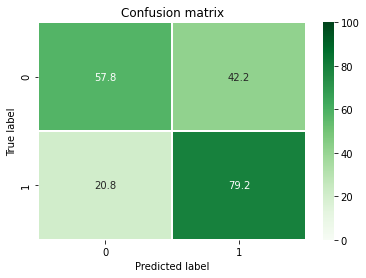

In [ ]:
cm=confusion_matrix(y_test,preds)
names = ['0', '1'] 
cm = 100 * cm.astype('float') / cm.sum(axis=-1)[:, np.newaxis]  
 

df = pd.DataFrame(data=cm, columns=names, index=names)
g = sns.heatmap(df, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=100,
                    cmap='Greens')
g.set_title('Confusion matrix')
g.set_ylabel('True label')
g.set_xlabel('Predicted label')
g.plot()

In [ ]:
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support, roc_auc_score)

gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train_u, y=y_train_u)
fit_params_of_xgb = {
    "early_stopping_rounds":100, 
    "eval_metric" : 'auc', 
    "eval_set" : [(X_val,y_val)],
    'verbose': 500,
}
params = {
    'booster': ["gbtree"],
    'learning_rate': [0.01],
    'n_estimators': [3000],
    'min_child_weight': [1],#1
    'gamma': [0],
    'subsample': [0.4],
    'colsample_bytree': [0.8],
    'max_depth': [4],
    "scale_pos_weight": [1],
    "reg_alpha":[1],#0.08
}
xgb_estimator = XGBClassifier(
    objective='binary:logistic',
    silent=True,
)

gsearch = GridSearchCV(
    estimator=xgb_estimator,
    param_grid=params,
    scoring='roc_auc',
    n_jobs=-1,
    cv=gkf, verbose=3
)
xgb_model = gsearch.fit(X=X_train_u, y=y_train_u, **fit_params_of_xgb)
gsearch.best_params_, gsearch.best_score_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 28.0min finished


[0]	validation_0-auc:0.616068
Will train until validation_0-auc hasn't improved in 100 rounds.
[500]	validation_0-auc:0.849996
[1000]	validation_0-auc:0.898368
[1500]	validation_0-auc:0.929896
[2000]	validation_0-auc:0.948959
[2500]	validation_0-auc:0.961204
[2999]	validation_0-auc:0.96942


({'booster': 'gbtree',
  'colsample_bytree': 0.8,
  'gamma': 0,
  'learning_rate': 0.01,
  'max_depth': 4,
  'min_child_weight': 1,
  'n_estimators': 3000,
  'reg_alpha': 1,
  'scale_pos_weight': 1,
  'subsample': 0.4},
 0.8188274170115543)

In [ ]:
predicted_values = xgb_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.61      0.52      0.56       600
           1       0.85      0.89      0.87      1800

    accuracy                           0.80      2400
   macro avg       0.73      0.70      0.71      2400
weighted avg       0.79      0.80      0.79      2400

Accuracy: 0.7954166666666667


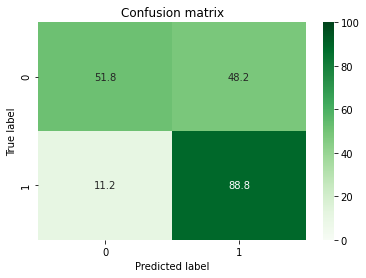

In [ ]:
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

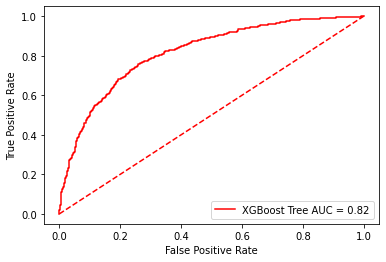

In [ ]:
actual = y_test
xg_tree_prob = [p[1] for p in xgb_model.predict_proba(X_test)]


dt_false_pos, dt_true_pos, _ = roc_curve(actual, xg_tree_prob)
dt_auc = auc(dt_false_pos, dt_true_pos)

# plot
plt.plot(dt_false_pos, dt_true_pos, 'r', label='XGBoost Tree AUC = %0.2f'% dt_auc)


plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

              precision    recall  f1-score   support

           0       0.59      0.49      0.54       600
           1       0.84      0.89      0.86      1800

    accuracy                           0.79      2400
   macro avg       0.71      0.69      0.70      2400
weighted avg       0.78      0.79      0.78      2400

Accuracy: 0.7875


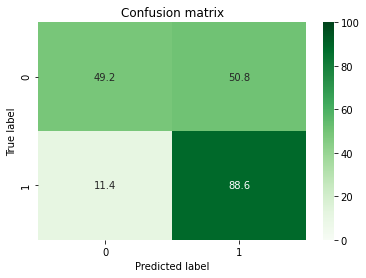

In [ ]:
clf = MLPClassifier((20, 20, ), max_iter=100000).fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.68      0.48      0.56       600
           1       0.84      0.93      0.88      1800

    accuracy                           0.81      2400
   macro avg       0.76      0.70      0.72      2400
weighted avg       0.80      0.81      0.80      2400

Accuracy: 0.8141666666666667


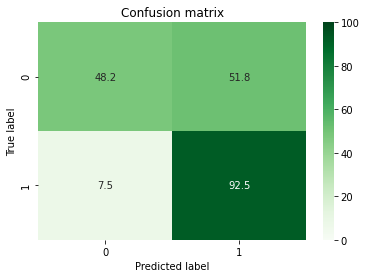

In [ ]:
clf = MLPClassifier((256, 64, 128, ), max_iter=100000, learning_rate="invscaling").fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

In [19]:
from xgboost.sklearn import XGBClassifier
import scipy.stats as st
from sklearn.model_selection import RandomizedSearchCV

model_xg = XGBClassifier(random_state=42,n_jobs=-1)

one_to_left = st.beta(10, 1) 

parameters6 = {  
    "n_estimators": st.randint(100,200), # Number of boosted trees to fit.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

xgb = RandomizedSearchCV(model_xg,parameters6, scoring='accuracy', n_iter=25, verbose= True)

xgb.fit(xtrain, ytrain)

print("Best score: %0.3f" % xgb.best_score_) 
print("Best parameters set:" )
best_parameters6 = xgb.best_estimator_.get_params()
for param_name6 in sorted (parameters6 . keys()): 
                    print("\t %s: %r" % (param_name6, best_parameters6[param_name6]))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 196.1min finished


Best score: 0.791
Best parameters set:
	 colsample_bytree: 0.9008244830528549
	 gamma: 3.0005403539442908
	 learning_rate: 0.18780597968585327
	 max_depth: 4
	 min_child_weight: 5.198782342226521
	 n_estimators: 170
	 reg_alpha: 8.552321663825467
	 subsample: 0.86915345991043


              precision    recall  f1-score   support

           0       0.63      0.37      0.47       600
           1       0.82      0.93      0.87      1800

    accuracy                           0.79      2400
   macro avg       0.72      0.65      0.67      2400
weighted avg       0.77      0.79      0.77      2400



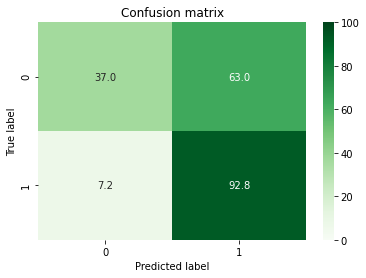

In [20]:
predicted_values = xgb.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["0", "1"])

In [35]:
clf = MLPClassifier((100, ), max_iter=100000).fit(X_train_u, y_train_u)

              precision    recall  f1-score   support

           0       0.52      0.71      0.60       600
           1       0.89      0.78      0.83      1800

    accuracy                           0.76      2400
   macro avg       0.70      0.75      0.72      2400
weighted avg       0.80      0.76      0.77      2400

Accuracy: 0.7633333333333333


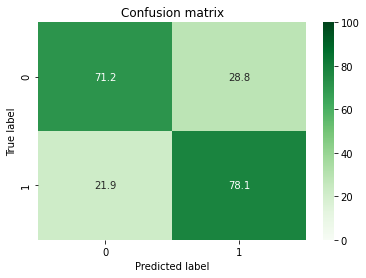

In [36]:
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["0", "1"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))